# Import necessary libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans

# Loading the Dataset

In [83]:
df = pd.read_csv("C:/Unified Mentor Private Limited/Amazon_Sales_Project.csv")
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


# Data Cleaning and Transformation

In [84]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [85]:
df.dropna(inplace=True)

In [86]:
# Convert data types (e.g., date columns)
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extracting year and month from the order date
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Year_Month'] = df['Order Date'].dt.to_period('M')

df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,Year_Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,2012-08
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,2013-02


In [87]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'Year',
       'Month', 'Year_Month'],
      dtype='object')

In [88]:
#df.columns=df.columns.str.strip()

In [89]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05,2013.230000,6.260000
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05,2.088231,3.353334
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03,2010.000000,1.000000
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05,2012.000000,4.000000
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05,2013.000000,6.000000
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05,2015.000000,9.250000
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06,2017.000000,12.000000


In [90]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'Year',
       'Month', 'Year_Month'],
      dtype='object')

In [91]:
df.shape

(100, 17)

# Sales Channel Performance

C:\Users\HP\AppData\Local\Temp\ipykernel_21092\1638725682.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  channel_performance = df.groupby('Sales Channel')['Total Revenue', 'Total Profit'].sum().reset_index()


<Figure size 1000x600 with 0 Axes>

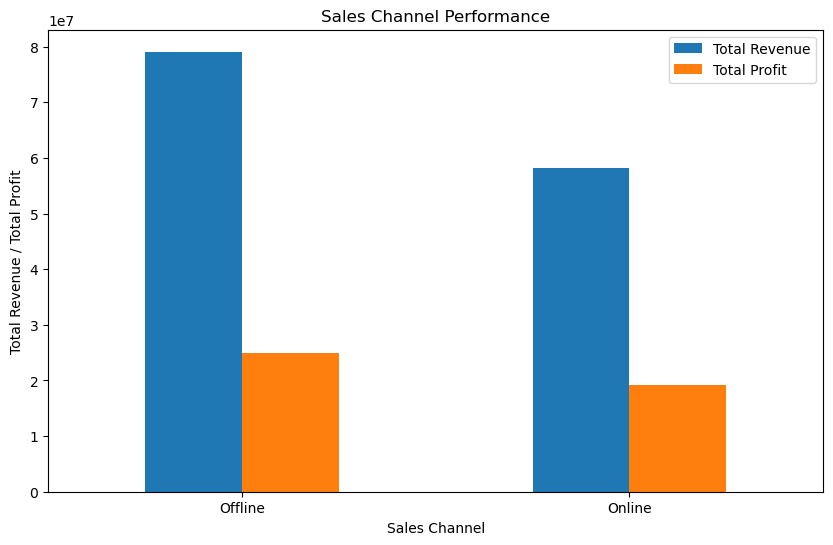

In [92]:
channel_performance = df.groupby('Sales Channel')['Total Revenue', 'Total Profit'].sum().reset_index()
plt.figure(figsize=(10, 6))
channel_performance.set_index('Sales Channel').plot(kind='bar', figsize=(10, 6))
plt.title('Sales Channel Performance')
plt.ylabel('Total Revenue / Total Profit')
plt.xlabel('Sales Channel')
plt.xticks(ticks=[0, 1], labels=['Offline', 'Online'], rotation=0)  # Explicitly label x-axis
plt.show()

# Profit Analysis by Region

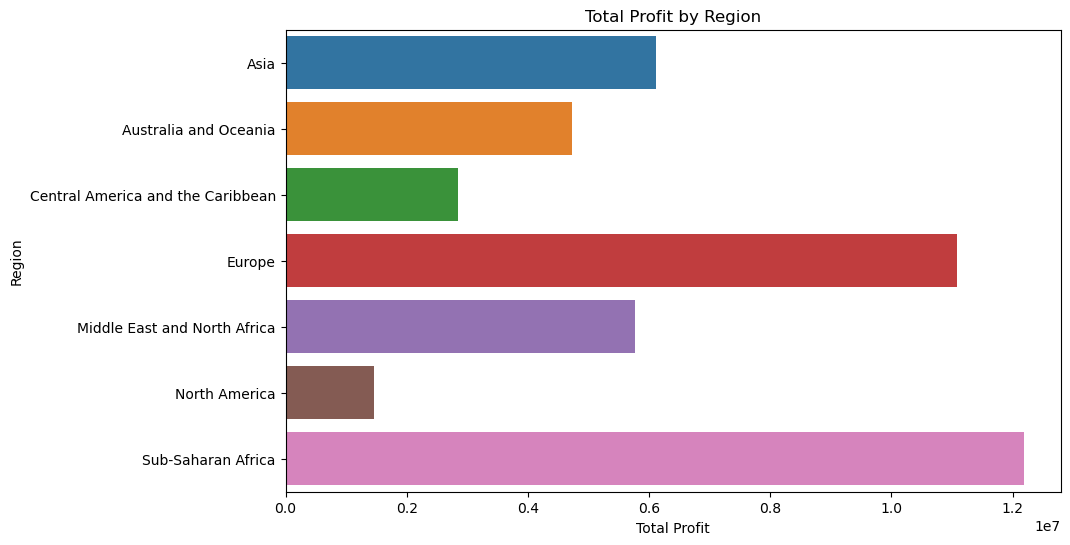

In [93]:
region_profit = df.groupby('Region')['Total Profit'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Profit', y='Region', data=region_profit)
plt.title('Total Profit by Region')
plt.xlabel('Total Profit')
plt.ylabel('Region')
plt.show()

In [94]:
if 'Year_Month' not in df.columns:
    df['Year_Month'] = df['Order Date'].dt.to_period('M')

In [95]:
df['Total Revenue'].dtype
df['Year_Month'].dtype

period[M]

# Year Month wise Sales

In [96]:
if pd.api.types.is_period_dtype(df['Year_Month']):
    df['Year_Month'] = df['Year_Month'].astype(str)
    df['Year_Month'] = pd.to_datetime(df['Year_Month'], format='%Y-%m')


In [97]:
df['Year_Month'].dtype

dtype('<M8[ns]')

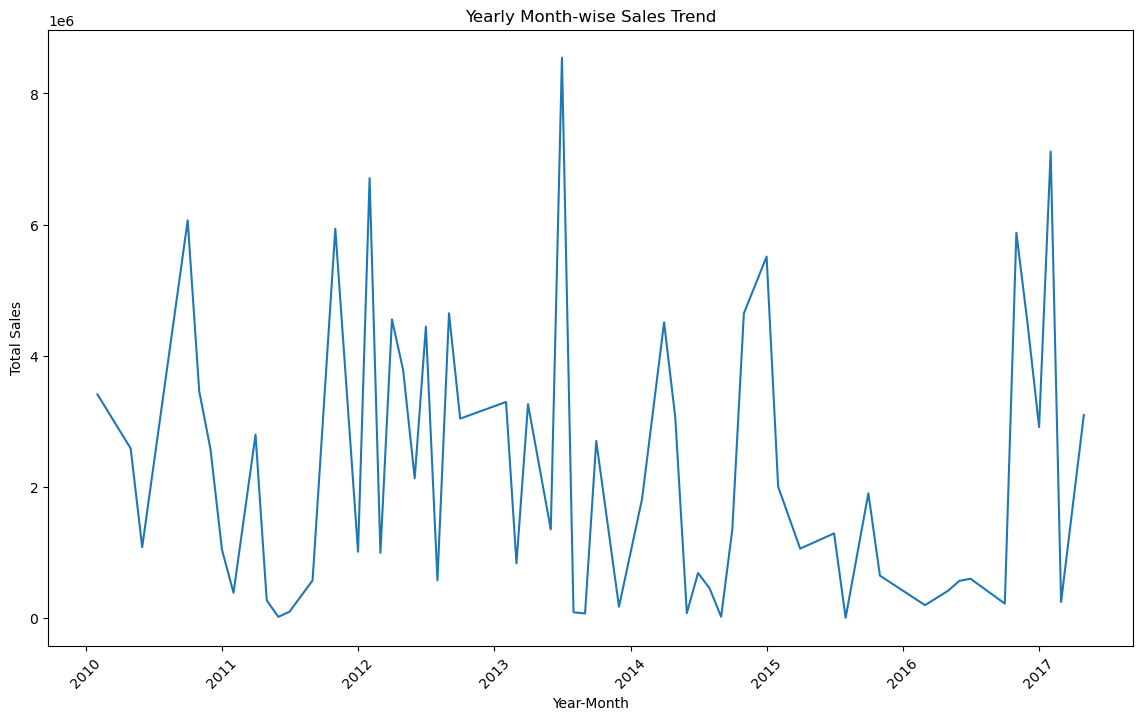

In [98]:
# Group by year and month and calculate total sales
year_month_sales = df.groupby('Year_Month')['Total Revenue'].sum().reset_index()

# Plot yearly month-wise sales trend
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year_Month', y='Total Revenue', data=year_month_sales)
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


# Correlation Analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_21092\1401817377.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


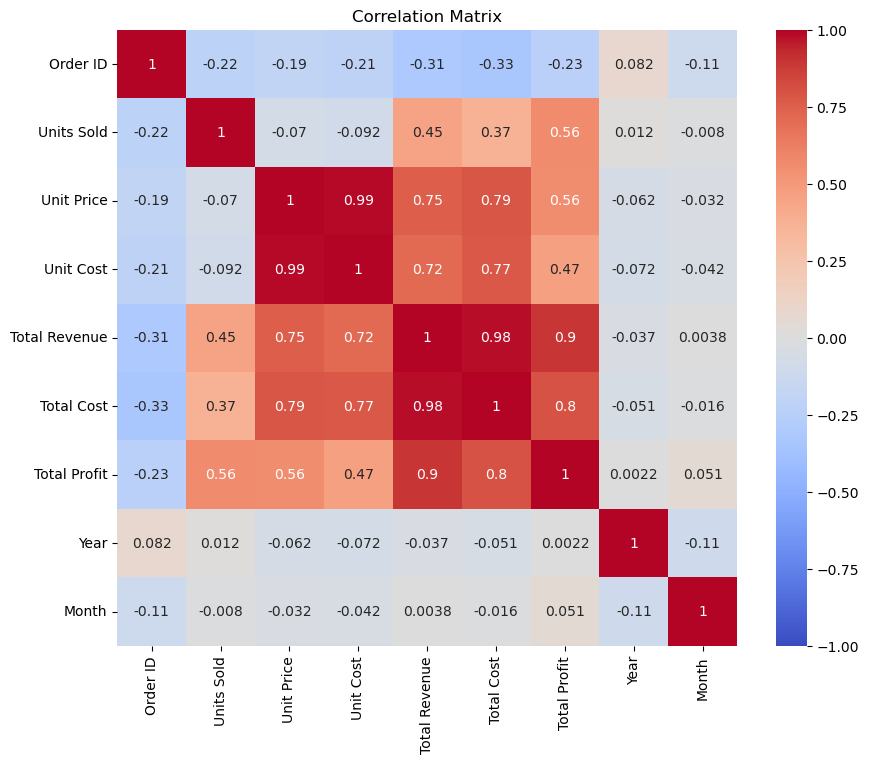

In [99]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Hypothesis Testing: Comparing Online and Offline Revenue

In [100]:
# Hypothesis Testing: Comparing Online and Offline Revenue
online_revenue = df[df['Sales Channel'] == 'Online']['Total Revenue']
offline_revenue = df[df['Sales Channel'] == 'Offline']['Total Revenue']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(online_revenue, offline_revenue, nan_policy='omit')
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: -1.4350442082570911, P-value: 0.15445830793087437


# Clustering for Customer Segmentation

In [101]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Set the number of threads to 1

from sklearn.cluster import KMeans

customer_data = df[['Units Sold', 'Total Revenue', 'Total Profit']]
kmeans = KMeans(n_clusters=3, n_init=10)  # Set n_init explicitly

df['Customer Segment'] = kmeans.fit_predict(customer_data)



C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Visualize clusters

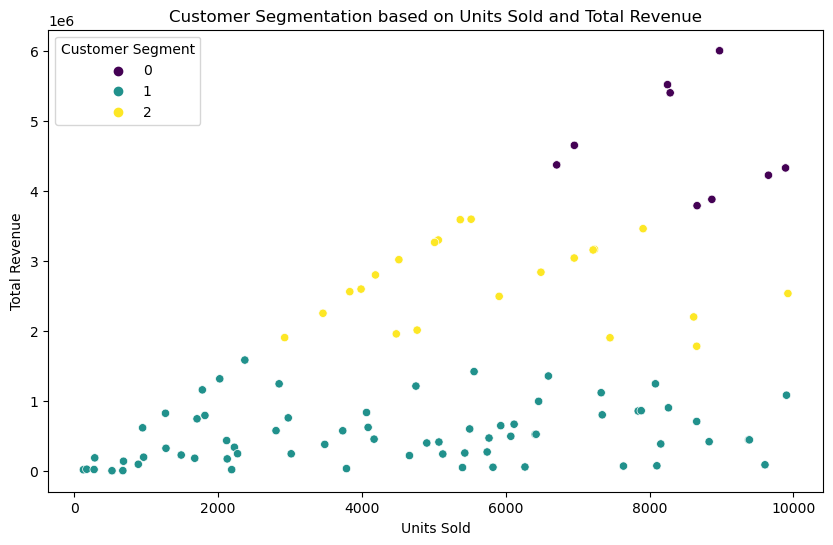

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Units Sold', y='Total Revenue', hue='Customer Segment', data=df, palette='viridis')
plt.title('Customer Segmentation based on Units Sold and Total Revenue')
plt.show()

# Predictive Modeling: Predicting Total Revenue

In [103]:
features = df.drop(columns=['Total Revenue', 'Order Date', 'Order ID', 'Ship Date', 'Year_Month'])
target = df['Total Revenue']

# Train-test split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Random Forest Regressor

In [105]:
df_duplicate = df.copy()
# Ensure to drop columns that should not be included in features
columns_to_drop = ['Total Revenue', 'Order Date', 'Order ID', 'Ship Date', 'Year_Month']  # Drop these columns for features
features = df_duplicate.drop(columns=columns_to_drop)


# One-hot encode categorical variables
features = pd.get_dummies(features, drop_first=True)

# Now, split the data into features and target
target = df_duplicate['Total Revenue']  # Ensure this is the target variable you want to predict

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Proceed with fitting the Random Forest model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error

rf_mse = mean_squared_error(y_test, rf_y_pred)
print(f'Random Forest Mean Squared Error: {rf_mse}')


Random Forest Mean Squared Error: 30897115067.031975


# Gradient Boosting Regressor

In [106]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
# Calculate Mean Squared Error
gb_mse = mean_squared_error(y_test, gb_y_pred)

# Print the MSE
print(f'Gradient Boosting Mean Squared Error: {gb_mse}')

Gradient Boosting Mean Squared Error: 16031477991.177988


# Evaluate the models

In [107]:
rf_mse = mean_squared_error(y_test, rf_y_pred)
gb_mse = mean_squared_error(y_test, gb_y_pred)
print(f'Random Forest Mean Squared Error: {rf_mse}')
print(f'Gradient Boosting Mean Squared Error: {gb_mse}')

Random Forest Mean Squared Error: 30897115067.031975
Gradient Boosting Mean Squared Error: 16031477991.177988


### Therefore Gradient Boosting Mean Squared Error is better performing than Random Mean Squared Error, the lower the error the bettter the model

In [108]:
# Key Metrics

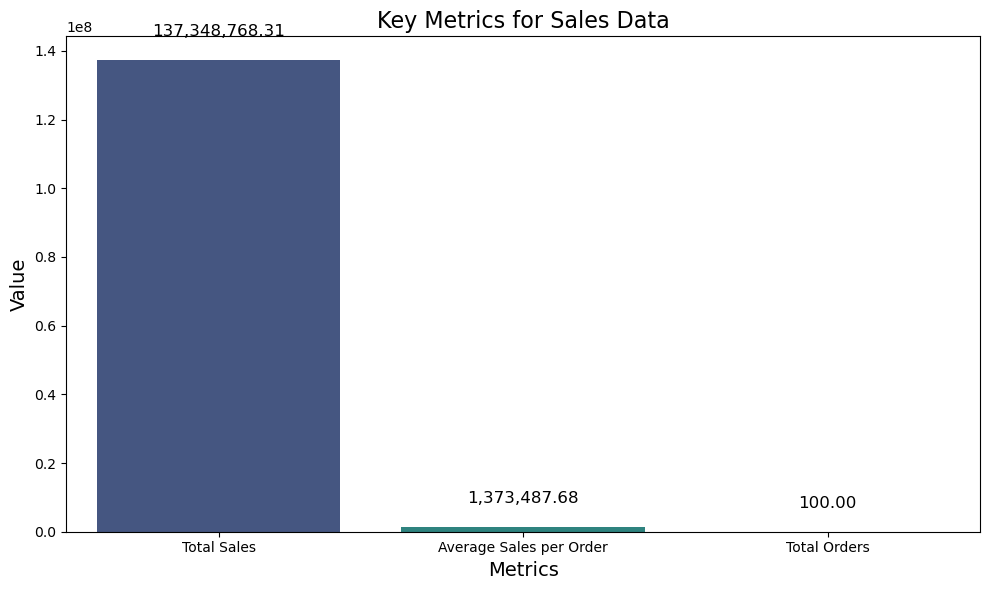

In [109]:
# Key metrics
total_sales = df['Total Revenue'].sum()
average_sales_per_order = df['Total Revenue'].mean()
total_orders = df['Order ID'].nunique()

# Data for visualization
metrics = ['Total Sales', 'Average Sales per Order', 'Total Orders']
values = [total_sales, average_sales_per_order, total_orders]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='viridis')

# Adding title and labels
plt.title('Key Metrics for Sales Data', fontsize=16)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Metrics', fontsize=14)

# Add data labels
for i, v in enumerate(values):
    plt.text(i, v + (0.05 * max(values)), f'{v:,.2f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

In [110]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,Year_Month,Customer Segment
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,2010-05-01,2
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,2012-08-01,1
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2014-05-01,1
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,2014-06-01,1
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,2013-02-01,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72,2011,7,2011-07-01,1
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47,2011,11,2011-11-01,1
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05,2016,6,2016-06-01,1
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02,2015,7,2015-07-01,1


In [111]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'Year',
       'Month', 'Year_Month', 'Customer Segment'],
      dtype='object')

# Time Series Analysis for Total Revenue

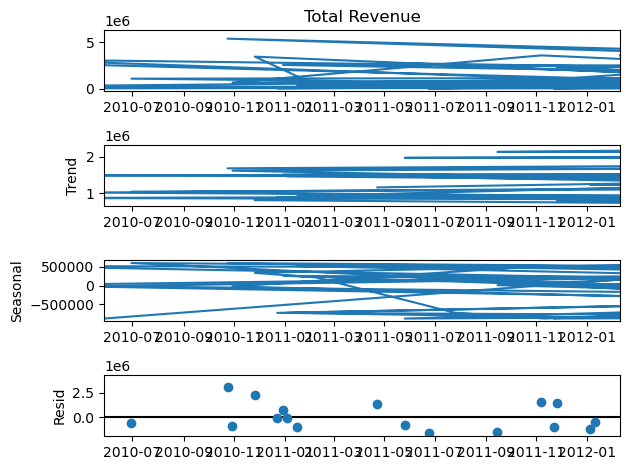

In [112]:
# Time Series Analysis for Total Revenue
df.set_index('Order Date', inplace=True)
result = seasonal_decompose(df['Total Revenue'], model='additive', period=12)
result.plot()
plt.show()

# Visualizations


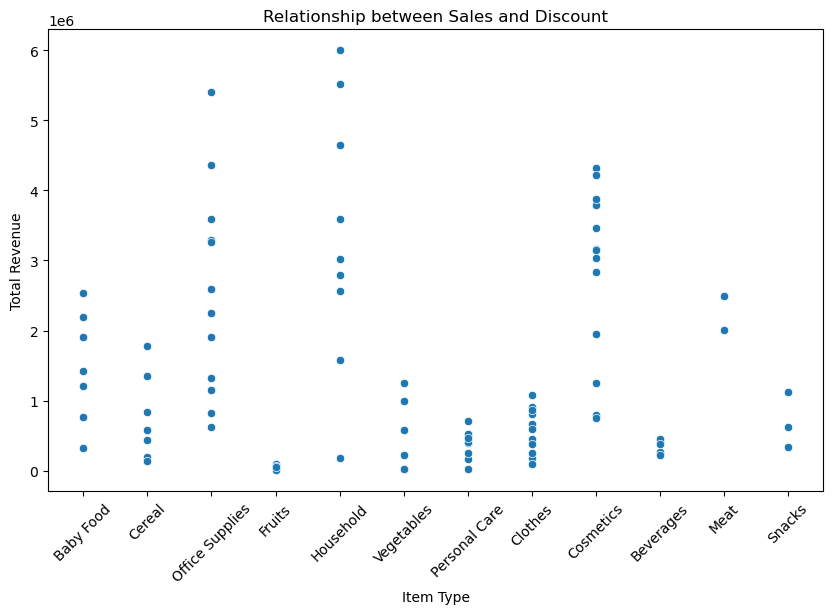

In [113]:
# Relationship between Total Revenue and Item Ty
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item Type', y='Total Revenue', data=df)
plt.title('Relationship between Sales and Discount')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


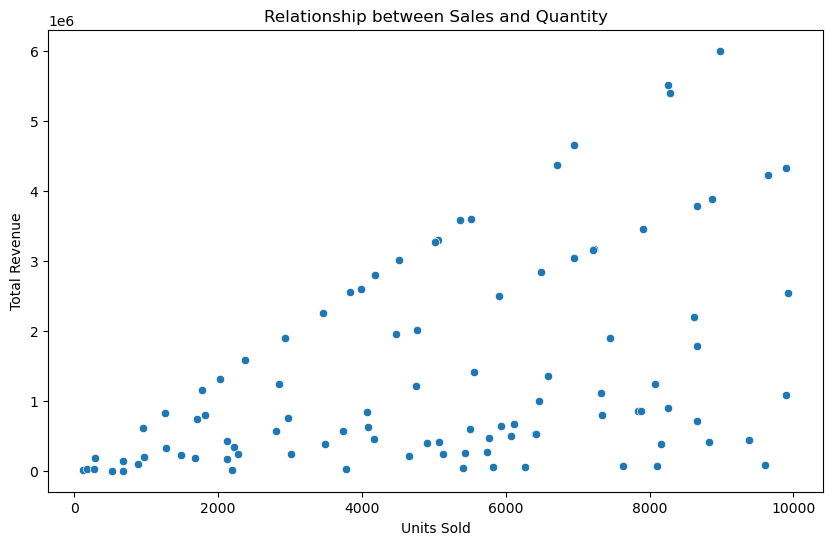

In [114]:
# Relationship between Total Revenue and Units Sold
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Units Sold', y='Total Revenue', data=df)
plt.title('Relationship between Sales and Quantity')
plt.xlabel('Units Sold')
plt.ylabel('Total Revenue')
plt.show()


# What is ARIMA?
ARIMA stands for AutoRegressive Integrated Moving Average. It's a popular time series forecasting model that combines three components:

AR (AutoRegressive): This part of the model uses the relationship between an observation and a number of lagged observations (previous time steps).
I (Integrated): This component involves differencing the raw observations to make the time series stationary (removing trends or seasonality).
MA (Moving Average): This part models the relationship between an observation and a residual error from a moving average model applied to lagged observations.

In [116]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(df['Total Revenue'], order=(5, 1, 0))
arima_model_fit = arima_model.fit()
forecast = arima_model_fit.forecast(steps=12)
print(f'Forecast for next 12 periods: {forecast}')

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsm

Forecast for next 12 periods: 100    6.361395e+05
101    4.759016e+05
102    8.615683e+05
103    9.047922e+05
104    1.361036e+06
105    1.494826e+06
106    8.267405e+05
107    8.977169e+05
108    1.051671e+06
109    1.102917e+06
110    1.189952e+06
111    1.104812e+06
Name: predicted_mean, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Stationarity: Before applying ARIMA, ensure that your time series is stationary (i.e., its statistical properties do not change over time). You can use ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots to identify how many differencing steps (
𝑑d) might be needed, and to choose the orders 𝑝p and 𝑞q.

Model Evaluation: After fitting the model, you should evaluate its performance using metrics such as AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) or perform cross-validation.

Parameter Tuning: The parameters 
(𝑝,𝑑,𝑞)
(p,d,q) may require tuning. You can use techniques like grid search, along with ACF and PACF plots, to determine the best parameters for your dataset.



C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


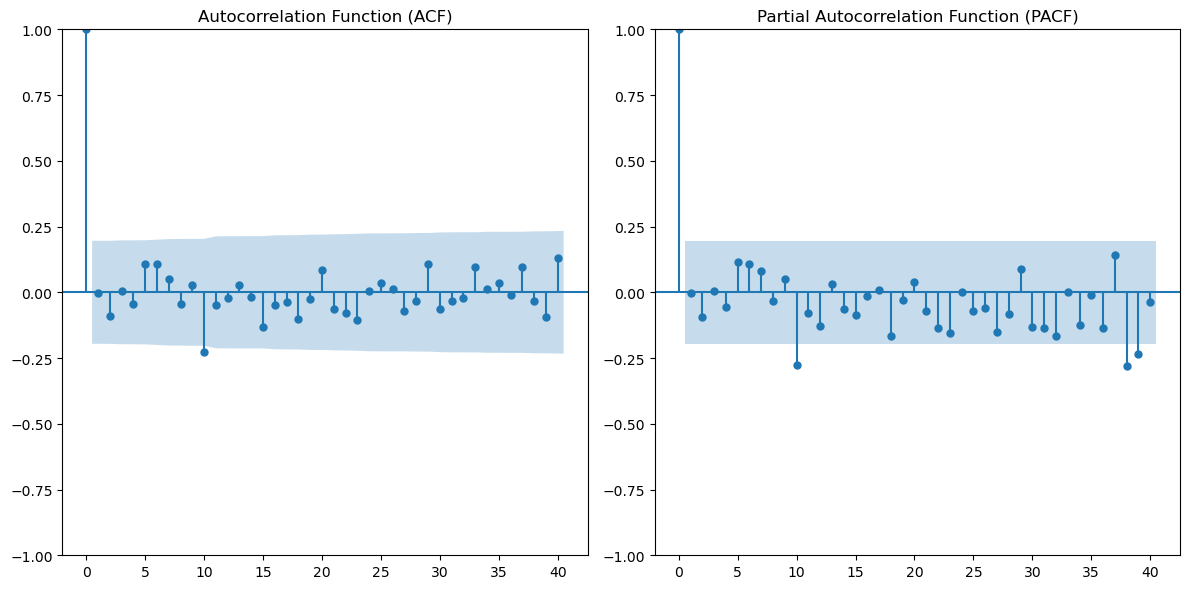

In [117]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(df['Total Revenue'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(1, 2, 2)
plot_pacf(df['Total Revenue'], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()
